11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 62s 127ms/step - accuracy: 0.8027 - loss: 0.6180 - val_accuracy: 0.9764 - val_loss: 0.0703
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 66s 94ms/step - accuracy: 0.9668 - loss: 0.1079 - val_accuracy: 0.9833 - val_loss: 0.0487
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 98ms/step - accuracy: 0.9774 - loss: 0.0734 - val_accuracy: 0.9882 - val_loss: 0.0351
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 95ms/step - accuracy: 0.9817 - loss: 0.0601 - val_accuracy: 0.9889 - val_loss: 0.0333
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 93ms/step - accuracy: 0.9862 - loss: 0.0484 - val_accuracy: 0.9897 - val_loss: 0.0289
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 95ms/step - accuracy: 0.9867 - loss: 0.0450 - val_accuracy: 0.9893 - val_loss: 0.0305
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 95ms/step - accuracy: 0.9882 - loss: 0.0369 - val_accuracy: 0.9911 - val_loss: 0.0274
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 95ms/step - accuracy: 0.9897 - loss: 0.0327 -

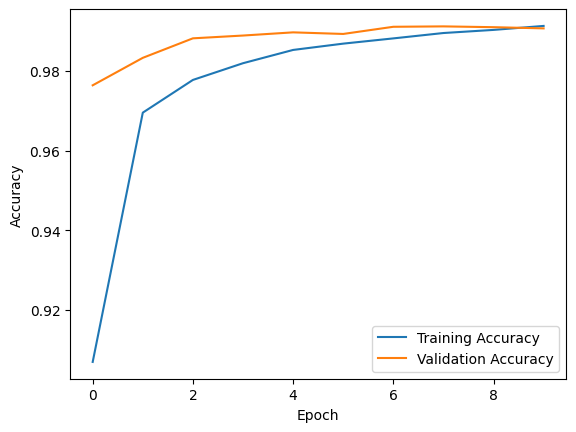

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize and reshape the data
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Add a channel dimension to the images (required for CNN)
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# One-hot encode the labels
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Define input shape and create model
input_shape = (28, 28, 1)
model = create_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training parameters
epochs = 10
batch_size = 128

# Train the model
history = model.fit(train_images, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()